### exploratory graphs and such

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
print sys.version

2.7.11 |Anaconda 2.3.0 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [6]:
# 
df = pd.read_csv('../data/nUrve_wDistances_0329.csv')
#df = pd.read_csv('../data/nUrve_wLU_0421.csv')
df.info()

/home/clayton/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058495 entries, 0 to 1058494
Data columns (total 33 columns):
ID                   1058495 non-null int64
GPS_DATETIMESTAMP    1058495 non-null object
GPS_LAT              1058495 non-null float64
GPS_LON              1058495 non-null float64
GPS_Speed            1058495 non-null float64
GPS_Alt              1058495 non-null float64
GPS_Sats             1058495 non-null float64
GPS_Fix              1058495 non-null float64
GPS_Quality          1058495 non-null float64
AMB_Temp             1058495 non-null float64
AMB_Humd             1058495 non-null float64
AMB_Lux              1058495 non-null float64
AMB_Snd              1058495 non-null float64
AMB_SndMin           1058495 non-null object
AMB_SndMax           1058494 non-null float64
AMB_SndMea           1058494 non-null float64
RDQ_AcX              1058494 non-null float64
RDQ_AcXMin           1058494 non-null float64
RDQ_AcXMax           1058494 non-null object
RDQ_AcXMea        

In [7]:
df.head()

,ID,GPS_DATETIMESTAMP,GPS_LAT,GPS_LON,GPS_Speed,GPS_Alt,GPS_Sats,GPS_Fix,GPS_Quality,AMB_Temp,...,RDQ_AcYMea,RDQ_AcZ,RDQ_AcZMin,RDQ_AcZMax,RDQ_AcZMea,SamplingCount,CCID_TEMP,timestamp,RawDistKM,TimeDiff
0,29281,2015-10-26 0:0:15.0,42.338428,-71.084632,17.28,7.6,8.0,1.0,10.0,8.79,...,1.6224,6.8647,6.5116,9.9243,8.7180,255.0,000_M,2015-10-26 00:00:15.000,NaN,NaN
1,29283,2015-10-26 0:0:15.0,42.338428,-71.084632,17.28,7.6,8.0,1.0,10.0,8.79,...,1.6264,8.6691,8.0807,10.0420,8.9303,255.0,000_M,2015-10-26 00:00:15.000,0.0,0.0
2,29285,2015-10-26 0:0:15.0,42.338428,-71.084632,17.28,7.6,8.0,1.0,10.0,8.79,...,1.1995,8.3553,7.0608,9.8066,8.6768,254.0,000_M,2015-10-26 00:00:15.000,0.0,0.0
3,29287,2015-10-26 0:0:15.0,42.338428,-71.084632,17.28,7.6,8.0,1.0,10.0,8.80,...,1.2894,9.1006,7.5707,9.8459,8.8541,255.0,000_M,2015-10-26 00:00:15.000,0.0,0.0
4,29289,2015-10-26 0:0:15.0,42.338428,-71.084632,17.28,7.6,8.0,1.0,10.0,8.79,...,1.4623,8.0415,7.3746,10.2774,8.6844,254.0,000_M,2015-10-26 00:00:15.000,0.0,0.0


In [8]:
# try subset without time/space, mean values where available
X_names = ['AMB_Lux', 'AMB_SndMea', 'RDQ_AcXMea', 'RDQ_AcYMea', 'RDQ_AcZMea', 'GPS_Speed']
X_vals = df.loc[:, X_names].values

In [9]:
# first what are overal stats
df.loc[:, X_names].describe().T.loc[:,('min', '25%', '50%', '75%', 'max')]

,min,25%,50%,75%,max
AMB_Lux,-9998.0000,140.0000,1618.0000,4066.0000,34413.0000
AMB_SndMea,118.5700,508.7400,509.7300,510.8900,980.8600
RDQ_AcXMea,-15.2991,-0.5321,0.3910,1.0723,10.4934
RDQ_AcYMea,-40.7714,-0.1983,0.2934,0.7878,22.8612
RDQ_AcZMea,-11.3912,8.9995,9.1592,9.5834,26.7638
GPS_Speed,0.0000,0.0100,0.0800,5.6600,58.6100


In [ ]:
# pd.tools.plotting.scatter_matrix(df.loc[:, X_names])
pd.tools.plotting.scatter_matrix(df.loc[:, X_names[:3]], figsize=(10,10));

In [ ]:
pd.tools.plotting.scatter_matrix(df.loc[:, X_names[2:5]], figsize=(10,10));

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df.AMB_Lux, bins=100);

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df.AMB_SndMea[~df.AMB_SndMea.isnull()], bins=50);

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df.AMB_SndMax[~df.AMB_SndMax.isnull()], bins=50);

In [ ]:
pd.tools.plotting.scatter_matrix(df.loc[:, ('RDQ_AcXMax', 'RDQ_AcYMax', 'RDQ_AcZMax')], figsize=(12,10));

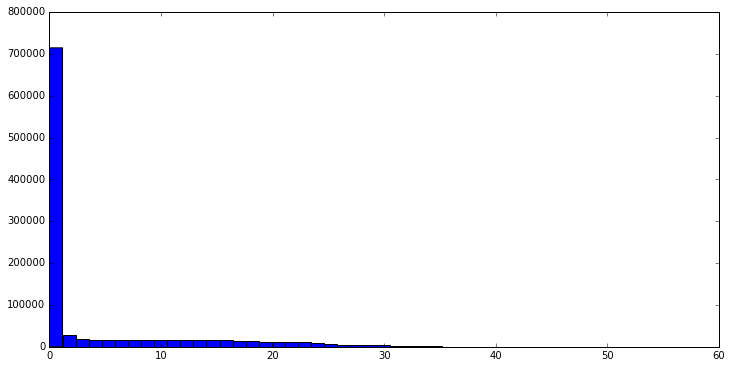

In [15]:
# df['RDQ_AcXMax2'] = df.RDQ_AcXMax.astype(float) # hmmm error returns: "0.          aX�YGYG"
plt.figure(figsize=(12,6))
plt.hist(df.GPS_Speed, bins=50);

In [ ]:
float(len(df.GPS_Speed[df.GPS_Speed>1]))/len(df.GPS_Speed)

In [11]:
# speed calculated from lat/lon observations
idx = (df.RawDistKM>0) & (df.TimeDiff>0) & (~df.TimeDiff.isnull()) & (~df.RawDistKM.isnull())

In [12]:
# using dataframes / series were crashing my kernel for some reason... no idea why
dist = df.RawDistKM[idx].values
tim = df.TimeDiff[idx].values

In [29]:
# speed in KPH
calc_speed = (dist / tim)*3600
len(calc_speed)

328392

(0, 100)

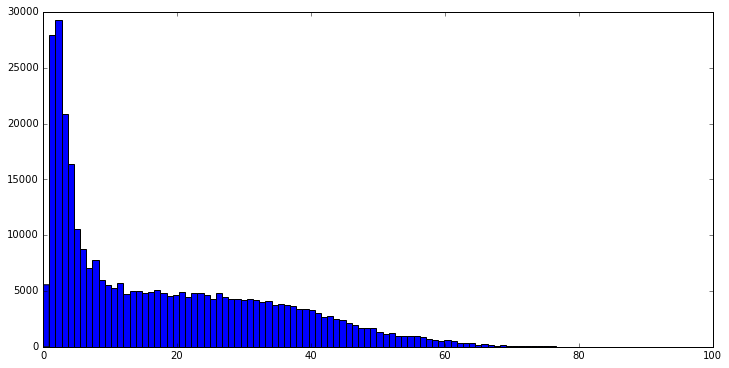

In [27]:
plt.figure(figsize=(12,6))
plt.hist(calc_speed, bins=1000);
plt.xlim(0,100)

In [28]:
# switch to using DQ's landuse version
df = pd.read_csv('../data/nUrve_wLU_0421.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513641 entries, 0 to 513640
Data columns (total 37 columns):
ID                   513641 non-null int64
GPS_DATETIMESTAMP    513641 non-null object
GPS_LAT              513641 non-null float64
GPS_LON              513641 non-null float64
GPS_Speed            513641 non-null float64
GPS_Alt              513641 non-null float64
GPS_Sats             513641 non-null float64
GPS_Fix              513641 non-null float64
GPS_Quality          513641 non-null float64
AMB_Temp             513641 non-null float64
AMB_Humd             513641 non-null float64
AMB_Lux              513641 non-null float64
AMB_Snd              513641 non-null float64
AMB_SndMin           513641 non-null float64
AMB_SndMax           513641 non-null float64
AMB_SndMea           513641 non-null float64
RDQ_AcX              513641 non-null float64
RDQ_AcXMin           513641 non-null float64
RDQ_AcXMax           513641 non-null float64
RDQ_AcXMea           513641 non-null 

In [31]:
print ', '.join(X_names)

AMB_Lux, AMB_SndMea, RDQ_AcXMea, RDQ_AcYMea, RDQ_AcZMea, GPS_Speed


In [37]:
df.groupby('LU05_DESC')[X_names].agg(['count', 'min', 'median', 'max']).T

LU05_DESC            Commercial  High Density Residential  Industrial  \
AMB_Lux    count   354340.00000                10377.0000  24550.0000   
           min      -9998.00000                -9998.0000  -9998.0000   
           median    1220.00000                 1970.0000   2411.0000   
           max      31608.00000                31181.0000  31014.0000   
AMB_SndMea count   354340.00000                10377.0000  24550.0000   
           min        118.57000                  173.2100    167.6100   
           median     509.46000                  509.9600    509.1500   
           max        955.01000                  889.1600    919.4300   
RDQ_AcXMea count   354340.00000                10377.0000  24550.0000   
           min        -11.87140                   -4.0211     -9.0850   
           median       0.73705                    0.0568      0.3174   
           max          9.09610                    4.2191      5.2443   
RDQ_AcYMea count   354340.00000                10377.0000  24550.0000   
           min         -9.83380                   -3.5718     -4.4018   
           median       0.31200                    0.0978      0.4175   
           max          9.37240                    5.3882      6.4511   
RDQ_AcZMea count   354340.00000                10377.0000  24550.0000   
           min        -10.42580                    8.1445    -10.3303   
           median       9.20500                    9.1076      9.2970   
           max         14.13200                   10.7907     11.3592   
GPS_Speed  count   354340.00000                10377.0000  24550.0000   
           min          0.00000                    0.0000      0.0000   
           median       0.18000                    1.4300      0.2300   
           max         45.57000                   42.0000     42.5000   

LU05_DESC          Multi-Family Residential  
AMB_Lux    count                124374.0000  
           min                   -9998.0000  
           median                 1524.0000  
           max                   31729.0000  
AMB_SndMea count                124374.0000  
           min                     171.0000  
           median                  509.8000  
           max                     906.3300  
RDQ_AcXMea count                124374.0000  
           min                      -8.1122  
           median                   -0.1914  
           max                       4.4729  
RDQ_AcYMea count                124374.0000  
           min                      -4.9633  
           median                    0.3260  
           max                       8.9095  
RDQ_AcZMea count                124374.0000  
           min                      -8.8105  
           median                    9.0972  
           max                      11.0731  
GPS_Speed  count                124374.0000  
           min                       0.0000  
           median                    0.0800  
           max                      45.4500

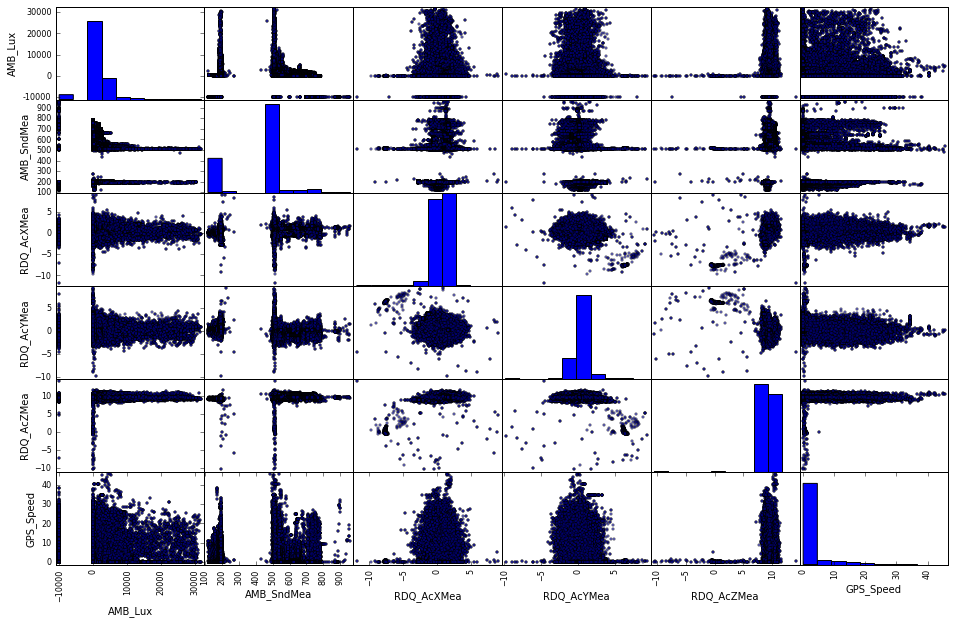

In [38]:
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='Commercial'].loc[:, X_names], figsize=(16,10));

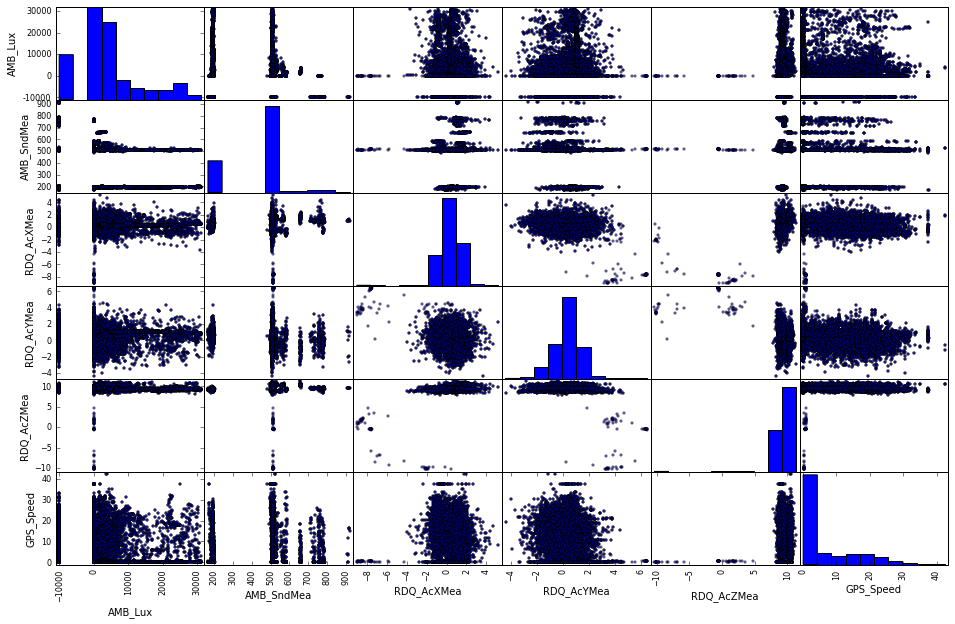

In [39]:
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='Industrial'].loc[:, X_names], figsize=(16,10));

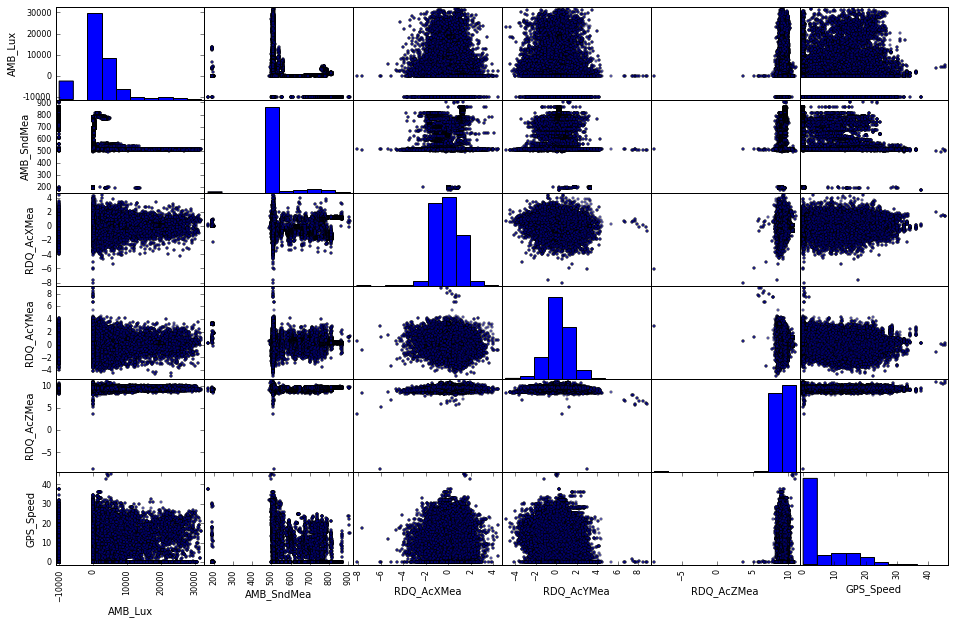

In [40]:
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='Multi-Family Residential'].loc[:, X_names], figsize=(16,10));

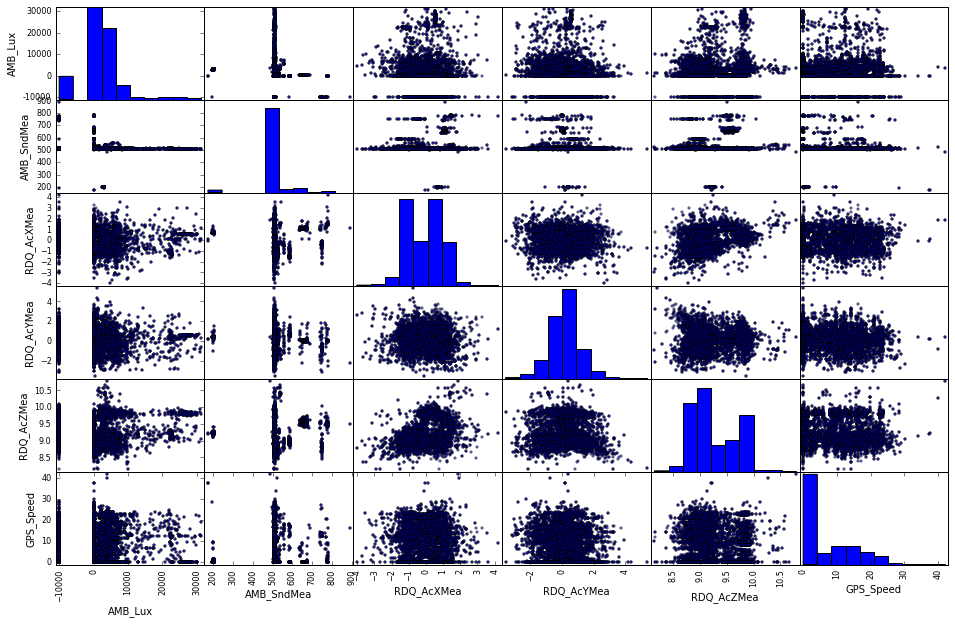

In [41]:
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='High Density Residential'].loc[:, X_names], figsize=(16,10));

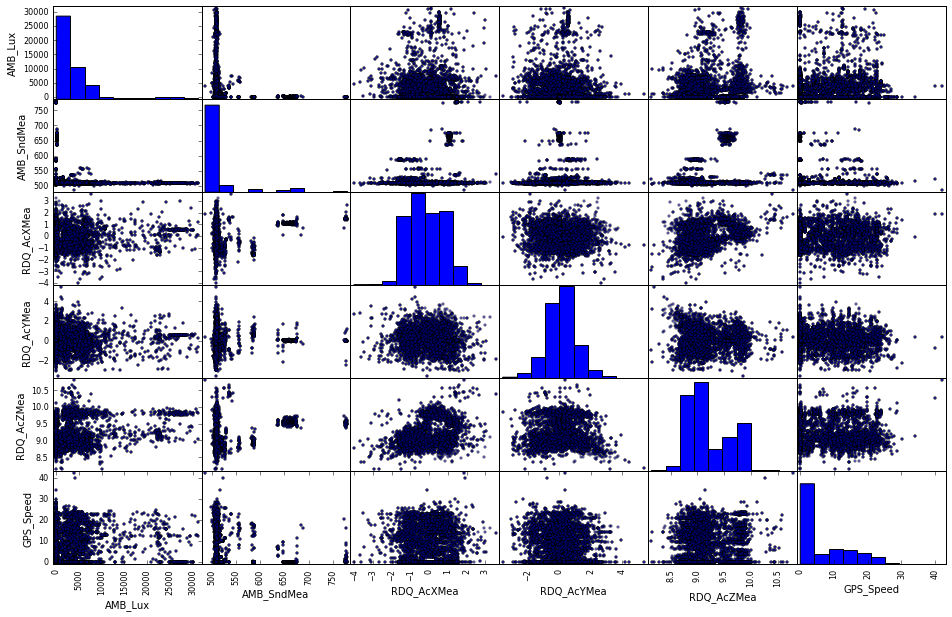

In [43]:
pd.tools.plotting.scatter_matrix(df[(df.LU05_DESC=='High Density Residential') & 
                                    (df.AMB_Lux>0) & (df.AMB_SndMea>400)].
                                 loc[:, X_names], figsize=(16,10));

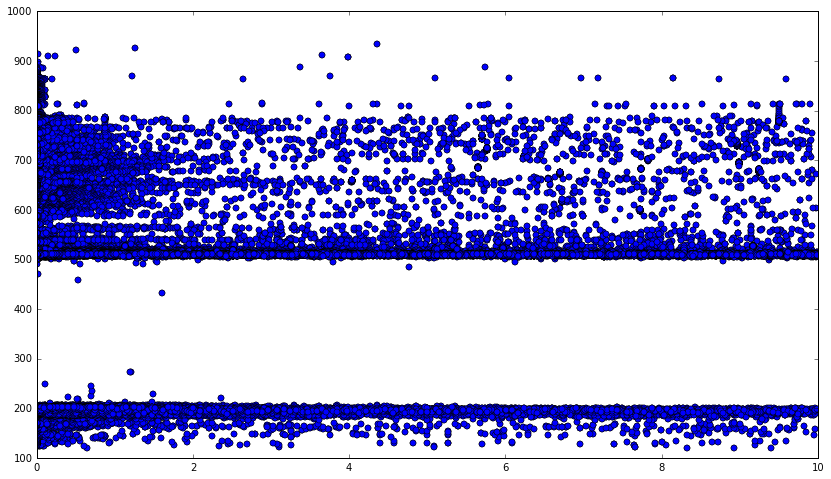

In [50]:
f, ax = plt.subplots(figsize=(14,8))
ax.plot(df[df.GPS_Speed<10].GPS_Speed, df[df.GPS_Speed<10].AMB_SndMea, 'o');

In [46]:
# len(df[(df.LU05_DESC=='High Density Residential') & (df.AMB_Lux>0) & (df.AMB_SndMea>400)]) # 8,998
# len(df[(df.LU05_DESC=='High Density Residential') & (df.AMB_Lux>0)]) # 9,256
len(df[(df.LU05_DESC=='High Density Residential')]) # 10,377

10377

### clustering - any relationship between "natural" clusters of these variables and land-use?

In [64]:
# try subset without time/space, mean values where available - reset to new dataset
X_vals = df.loc[:, X_names].values

In [51]:
#from sklearn.cluster import AgglomerativeClustering as AggClust
# use scipy's version for dendrogram vizualization
from scipy.cluster import hierarchy as hclust

In [65]:
# normalize data
X_norm = (X_vals - X_vals.mean())/X_vals.std()

In [66]:
links = hclust.linkage(X_norm, 'ward', metric='euclidean') # probably should have expected that

MemoryError: 

In [53]:
from sklearn.cluster import KMeans

In [68]:
for i in [3,4,5]:
    km = KMeans(n_clusters=i)
    df['km'+str(i)] = km.fit_predict(X_norm)

In [69]:
df.groupby(['km3', 'km4', 'km5', 'LU05_DESC'])['ID'].count()

km3  km4  km5  LU05_DESC               
0    0    0    Commercial                  254574
               High Density Residential      4664
               Industrial                    8767
               Multi-Family Residential     64482
          3    Commercial                   23858
               High Density Residential      1010
               Industrial                    2008
               Multi-Family Residential      7241
     2    1    Commercial                    4257
               High Density Residential       256
               Industrial                     716
               Multi-Family Residential      4409
          3    Commercial                   46927
               High Density Residential      2694
               Industrial                    4554
               Multi-Family Residential     26433
1    2    1    Commercial                    2487
               High Density Residential       132
               Industrial                     772
          

In [74]:
df.groupby(['km4', 'LU05_DESC'])['ID'].count().sort_values(ascending=False)

km4  LU05_DESC               
0    Commercial                  278432
     Multi-Family Residential     71723
2    Commercial                   53671
     Multi-Family Residential     32770
1    Commercial                   15638
     Multi-Family Residential     13914
0    Industrial                   10775
3    Commercial                    6599
2    Industrial                    6042
3    Multi-Family Residential      5967
0    High Density Residential      5674
3    Industrial                    3877
1    Industrial                    3856
2    High Density Residential      3082
1    High Density Residential      1121
3    High Density Residential       500
Name: ID, dtype: int64

In [90]:
print ', '.join(X_names)

AMB_Lux, AMB_SndMea, RDQ_AcXMea, RDQ_AcYMea, RDQ_AcZMea, GPS_Speed


In [94]:
df.pivot_table(index='km4', columns='LU05_DESC', values='ID', aggfunc=np.count_nonzero)

LU05_DESC,Commercial,High Density Residential,Industrial,Multi-Family Residential
km4,,,,
0,278432,5674,10775,71723
1,15638,1121,3856,13914
2,53671,3082,6042,32770
3,6599,500,3877,5967


In [91]:
df.pivot_table(index='km3', columns='LU05_DESC', values='ID', aggfunc=np.count_nonzero)

LU05_DESC,Commercial,High Density Residential,Industrial,Multi-Family Residential
km3,,,,
0,329616,8624,16045,102565
1,9086,632,4649,7895
2,15638,1121,3856,13914


In [92]:
df.pivot_table(index='km5', columns='LU05_DESC', values='ID', aggfunc=np.count_nonzero)

LU05_DESC,Commercial,High Density Residential,Industrial,Multi-Family Residential
km5,,,,
0,254574,4664,8767,64482
1,10580,490,2224,8155
2,15638,1121,3856,13914
3,70785,3704,6562,33674
4,2763,398,3141,4149


In [80]:
# set landuse types to integer value
uses = dict(zip(sorted(df.LU05_DESC.unique()), range(4)))
Y = df.LU05_DESC.apply(lambda x: uses[x])

In [83]:
# convert to numpy array
Y = Y.values

In [86]:
# export visualization of fit tree - at least for me takes AGES to convert from .dot to .pdf...
#from sklearn.externals.six import StringIO
#with open("test_tree.dot", 'w') as f:
#    f = tree.export_graphviz(clf, out_file=f)

In [87]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vals, Y, test_size=0.33, random_state=42)

In [88]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
correct = y_pred==y_test

In [102]:
correct.sum() / float(len(correct))

0.95853146275560175

In [112]:
for i in range(4):
    print 'in LU {} there are {} records, {:.2f} of total'.format(i,len(y_test[y_test==i]), 
                                                                  len(y_test[y_test==i])*100./len(y_test))

in LU 0 there are 116800 records, 68.91 of total
in LU 1 there are 3412 records, 2.01 of total
in LU 2 there are 8220 records, 4.85 of total
in LU 3 there are 41070 records, 24.23 of total
